<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Feature-Selection-Pt.1-Find-best-subset-of-features" data-toc-modified-id="Feature-Selection-Pt.1-Find-best-subset-of-features-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Feature Selection Pt.1 Find best subset of features</a></span><ul class="toc-item"><li><span><a href="#Sort-Genes/Columns-by-ANOVA-score-with-KBest" data-toc-modified-id="Sort-Genes/Columns-by-ANOVA-score-with-KBest-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Sort Genes/Columns by ANOVA score with KBest</a></span></li><li><span><a href="#Run-an-SVM-on-multiple-gene/column-subsets-to-find-best-one" data-toc-modified-id="Run-an-SVM-on-multiple-gene/column-subsets-to-find-best-one-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Run an SVM on multiple gene/column subsets to find best one</a></span></li></ul></li><li><span><a href="#Misc-Plots-(work-on-3d-visualization)" data-toc-modified-id="Misc-Plots-(work-on-3d-visualization)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Misc Plots (work on 3d visualization)</a></span></li><li><span><a href="#Classification-(work-in-progress)" data-toc-modified-id="Classification-(work-in-progress)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Classification (work in progress)</a></span></li></ul></div>

In [1]:
# Packages

import sys
print("Python version: {}". format(sys.version))

import os
print("OS version: {}". format(os.uname()))

import pandas as pd
print("pandas version: {}". format(pd.__version__))

import matplotlib
print("matplotlib version: {}". format(matplotlib.__version__))
import matplotlib.pyplot as plt

import numpy as np
print("NumPy version: {}". format(np.__version__))

import scipy as sp 
print("SciPy version: {}". format(sp.__version__)) 

import sklearn 
print("scikit-learn version: {}". format(sklearn.__version__))

#misc
import random
import time

print('-'*25)

Python version: 3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:07:29) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
OS version: posix.uname_result(sysname='Darwin', nodename='Bings-MacBook-Pro.local', release='17.4.0', version='Darwin Kernel Version 17.4.0: Sun Dec 17 09:19:54 PST 2017; root:xnu-4570.41.2~1/RELEASE_X86_64', machine='x86_64')
pandas version: 0.23.1
matplotlib version: 2.2.2
NumPy version: 1.14.5
SciPy version: 1.1.0
scikit-learn version: 0.19.1
-------------------------


In [2]:
PATH = "AML-DATA/"

X = pd.read_csv(PATH + "X_mod.csv", index_col = 0)

y = pd.read_pickle(PATH + "PROCESSED-TARGET-AML-Y.pkl")


In [3]:
X.head()

,OR4G2P,OR4F4,OR4F29 /// OR4F16 /// OR4F3,LOC100287934,FAM87B,LINC01128,SAMD11,KLHL17,PLEKHN1,ISG15,...,TTTY5,GUSBP1 /// SMA4 /// SMA5 /// GUSBP3 /// LOC105369186 /// LOC102724292 /// LOC101928993 /// LOC100653061 /// LOC102725009,GUSBP1 /// SMA4 /// SMA5 /// LOC105369186 /// LOC102724292 /// LOC101928993 /// LOC100653061,OR10C1,HLA-F /// HLA-G /// HLA-H,C6orf48,OR5V1,OR11A1,ZNRD1-AS1,GPSM3
TARGET-20-PABHET,-0.578220,-0.496468,-0.417386,0.655024,-0.798051,0.422296,0.360586,-0.485991,0.014931,0.762052,...,0.280646,0.675379,0.735445,0.539480,-0.252887,1.784525,-1.125916,-0.755813,0.124045,-1.219955
TARGET-20-PABHKY,-0.655221,-0.310280,-0.180097,0.521612,0.207194,0.438621,0.291989,0.187360,1.252351,2.221038,...,1.331470,0.847426,0.863211,1.833610,1.498381,0.676731,-1.213044,-0.197946,-0.236335,-0.037084
TARGET-20-PACDZR,-0.815846,-0.442479,-0.226525,1.660114,0.171987,-0.209545,-0.771887,0.366325,-0.004730,0.177329,...,2.005038,1.455398,1.332086,0.701104,0.694717,1.475351,-0.825630,-1.252602,-0.234714,-0.452149
TARGET-20-PADDXZ,-0.560854,-0.279067,-0.023409,0.353869,0.861383,1.328603,0.714987,1.280528,0.398754,0.700890,...,1.961599,-0.523511,-0.172852,1.335789,1.598477,1.754672,-0.638689,0.247643,-0.855112,0.285873
TARGET-20-PADZKD,1.173657,-0.013564,0.975696,-0.062624,-1.033628,-1.434103,1.508402,0.869525,2.062670,0.395210,...,1.828480,-0.893355,-0.887509,0.593984,-0.025396,0.287487,0.202399,1.678195,-0.366990,0.160636


In [4]:
y.value_counts()

0.0    68
1.0    42
Name: First Event, dtype: int64

## Feature Selection Pt.1 Find best subset of features

### Sort Genes/Columns by ANOVA score with KBest 
Highest Score = Column 0, Lowest Score = Column ~20000

In [5]:
from sklearn.feature_selection import SelectKBest

kbest = SelectKBest()
kbest.fit(X, y)

SelectKBest(k=10, score_func=<function f_classif at 0xa194a1268>)

In [6]:
X = X.T
X["gene_score"] = pd.Series(kbest.scores_, index = X.index).astype("float64")


In [7]:
X.sort_values(by = "gene_score", axis = 0, inplace=True, ascending = False)
X=X.T
X.drop("gene_score", inplace = True, axis = 0)

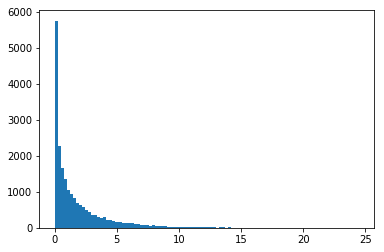

In [8]:
plt.hist(kbest.scores_, bins = 100);
plt.show()

In [9]:
len(X.columns)

20942

### Run an SVM on multiple gene/column subsets to find best one

In [10]:
subsets = [5, 10, 15, 20, 30, 50, 75, 100, 130, 170, 
           200, 240, 280, 320, 370, 440, 580, 700, 
           850, 1000, 1200, 1350, 1500, 1800]

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
from tqdm import tqdm_notebook


subsetTester = SVC()
k_fold  = RepeatedStratifiedKFold(10, n_repeats = 3, random_state = 100)
accs = [[] * 24 for x in range(24)]

aucs = [[] * 24 for x in range(24)]


In [12]:
# Outer for loop tests each subset boundary, inner for loop perfers repeated stratified kfold validation

for i in tqdm_notebook(range(len(subsets))):
    
    subX = X.iloc[:, :subsets[i]]
    
    k = 1
    for k, (train, test) in enumerate(k_fold.split(subX, y)):

        subsetTester.fit(subX.iloc[train], y.iloc[train])
        accuracy = subsetTester.score(subX.iloc[test], y.iloc[test])
        accs[i].append(accuracy)

        y_pred = subsetTester.predict(subX.iloc[test])
        roc_auc = roc_auc_score(y.iloc[test], y_pred)
        aucs[i].append(roc_auc)

        k+=1

In [13]:
from statistics import mean

for i in range(24):
    accs[i] = mean(accs[i]) 
    aucs[i] = mean(aucs[i])

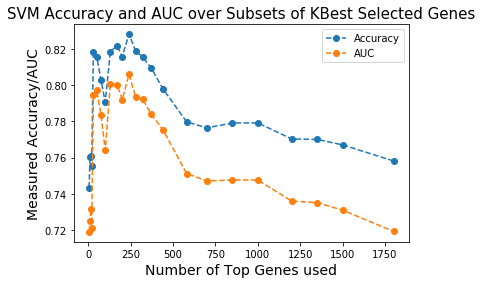

In [14]:
# Plot lines - plt.plot(X, Y, label=xxx)
accline, = plt.plot(subsets, accs, "o--", label = "Accuracy")
aucline, = plt.plot(subsets, aucs, "o--", label = "AUC")

# Legend
plt.legend(handles=[accline, aucline])

# Label stuff
plt.title("SVM Accuracy and AUC over Subsets of KBest Selected Genes", fontsize = 15)
plt.xlabel("Number of Top Genes used", fontsize = 14)
plt.ylabel("Measured Accuracy/AUC", fontsize = 14)



plt.show()

## Misc Plots (work on 3d visualization)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca = pca.fit(X)
X_pca = pca.transform(X.copy())

from sklearn.manifold import TSNE
tsne = TSNE(n_components = 3)
X_tsne = tsne.fit_transform(X.copy())


In [ ]:
target_names = ["Censored", "Relapse"]
colors = ['navy', 'turquoise', 'darkorange']

plt.figure()

lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Low-risk AML Gene Expression')

plt.show()

In [ ]:
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

In [ ]:
plt.figure()

lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('T-SNE of Low-risk AML Gene Expression')

plt.show()

## Classification (work in progress)

In [ ]:

k = 1
for k, (train, test) in tqdm(enumerate(k_fold.split(X, y))):
    
    #isomap = Isomap(n_components = 10)
    #isomap.fit(X.iloc[train])
    #X_train_isomap = isomap.transform(X.iloc[train].copy())
    #X_test_isomap = isomap.transform(X.iloc[test].copy())
    kbest.fit(X.iloc[train], y.iloc[train])
    X_train = kbest.transform(X.iloc[train].copy())
    X_test = kbest.transform(X.iloc[test].copy())
    
    svm.fit(X_train, y.iloc[train])
    accuracy = svm.score(X_test, y.iloc[test])
    accs.append(accuracy)
    
    y_pred = svm.predict(X_test)
    roc_auc = roc_auc_score(y.iloc[test], y_pred)
    aucs.append(roc_auc)
    
    
    
    k+=1


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from tqdm import tqdm
from sklearn.manifold import Isomap 
from sklearn.metrics import roc_auc_score


k_fold  = RepeatedStratifiedKFold(10, n_repeats = 3, random_state = 100)
accs = []
aucs = []
svm = SVC(kernel = "linear", C=0.01)
kbest = SelectKBest(k=30)


k = 1
for k, (train, test) in tqdm(enumerate(k_fold.split(X, y))):
    
    #isomap = Isomap(n_components = 10)
    #isomap.fit(X.iloc[train])
    #X_train_isomap = isomap.transform(X.iloc[train].copy())
    #X_test_isomap = isomap.transform(X.iloc[test].copy())
    kbest.fit(X.iloc[train], y.iloc[train])
    X_train = kbest.transform(X.iloc[train].copy())
    X_test = kbest.transform(X.iloc[test].copy())
    
    svm.fit(X_train, y.iloc[train])
    accuracy = svm.score(X_test, y.iloc[test])
    accs.append(accuracy)
    
    y_pred = svm.predict(X_test)
    roc_auc = roc_auc_score(y.iloc[test], y_pred)
    aucs.append(roc_auc)
    
    
    
    k+=1


In [ ]:
from statistics import mean

print(mean(accs), mean(aucs))